# Step 0: Importing libraries and data

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Importing the data

In [72]:
df = pd.read_csv(input("Enter the file name: "))
# To see first 10 data
df.head(10)

Enter the file name: /content/drive/MyDrive/ML-Projects-2025/house-price-prediction/train.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [73]:
# To see some information about our data
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)

# Step 2: Cleaning the data

## Cleaning

In [74]:
# Counting NaN values in all columns
nan_count = df.isna().sum()

print(nan_count.sort_values(ascending=False))
# Now we know we have a lot Nan valuse so we have to fix that

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64


In [75]:
# Deleting some culmns
df = df.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [76]:
# I want to delete empty datas
# at first I used df.dropna() but it deleted over 1160 data so instead of that
# I'm using SimpleImputer to prevent losinig that much data
# I'm replacing tham with most frequent data in each column
numbric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create separate imputers for numeric and categorical data
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers to respective columns
df[numbric_columns] = numeric_imputer.fit_transform(df[numbric_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])


# Now I'm changing it to pd
new_data = pd.DataFrame(df, columns=df.columns)

# Convert some culms to numeric
for column in new_data.columns:
  if column in numbric_columns:
    new_data[column] = pd.to_numeric(new_data[column], errors='coerce')

Now we fix that priblem wwithout losing any data but we want to be sure so let's check that again

In [77]:
# Checking again
# Counting NaN values in all columns
nan_count = new_data.isna().sum()

print(nan_count.sort_values(ascending=False))

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64


It seems it worked

In [78]:
if new_data.shape == df.shape:
  print('No data is lost')
else:
  print('Data is lost')

No data is lost


In [79]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

Some of our data type is string but we need integer so we have to change them

In [80]:
# they're object value in my data that I have to convrt it to numbric
for column in new_data.columns:
  if new_data[column].dtype == 'object':
    new_data[column] = pd.Categorical(new_data[column]).codes

In [81]:
new_data.head(10)
# Now we will see the job is done and we heve correct data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3,65.000000,8450.0,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4,208500.0
1,20.0,3,80.000000,9600.0,1,3,3,0,2,0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4,181500.0
2,60.0,3,68.000000,11250.0,1,0,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4,223500.0
3,70.0,3,60.000000,9550.0,1,0,3,0,0,0,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0,140000.0
4,60.0,3,84.000000,14260.0,1,0,3,0,2,0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4,250000.0
5,50.0,3,85.000000,14115.0,1,0,3,0,4,0,...,0.0,320.0,0.0,0.0,700.0,10.0,2009.0,8,4,143000.0
6,20.0,3,75.000000,10084.0,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,8,4,307000.0
7,60.0,3,70.049958,10382.0,1,0,3,0,0,0,...,228.0,0.0,0.0,0.0,350.0,11.0,2009.0,8,4,200000.0
8,50.0,4,51.000000,6120.0,1,3,3,0,4,0,...,205.0,0.0,0.0,0.0,0.0,4.0,2008.0,8,0,129900.0
9,190.0,3,50.000000,7420.0,1,3,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,8,4,118000.0


In [82]:
def columns_giver():
  for column in new_data.columns:
    yield column

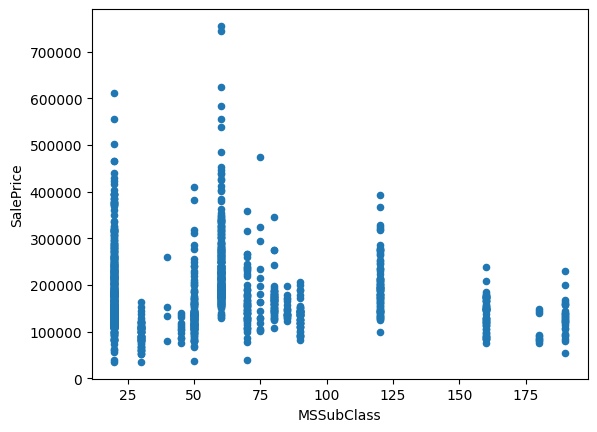

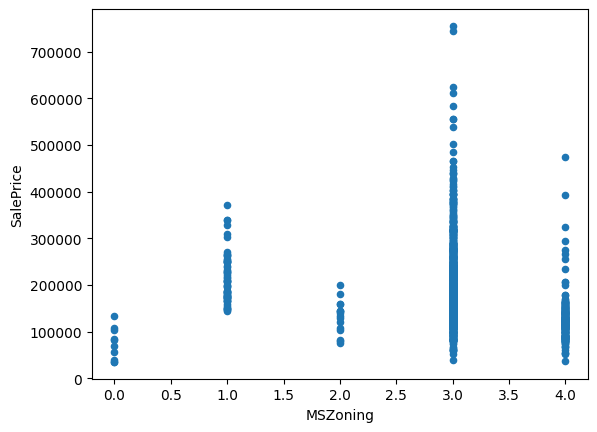

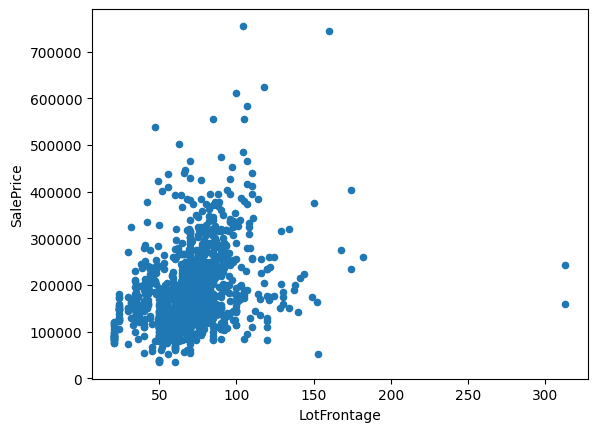

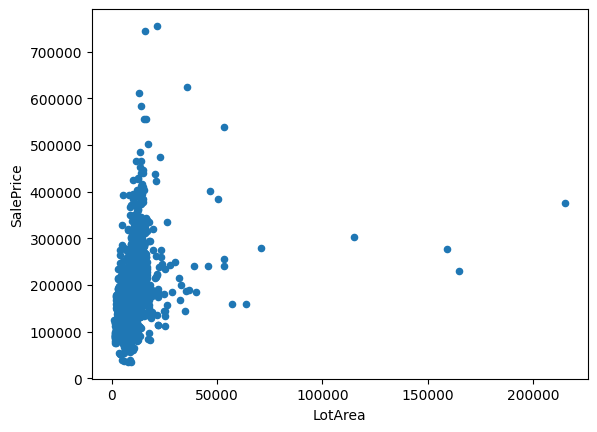

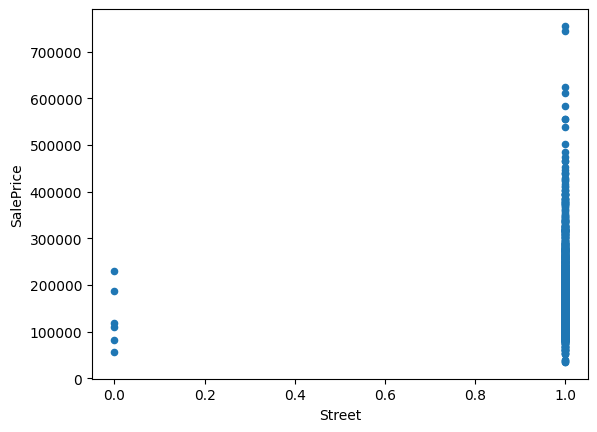

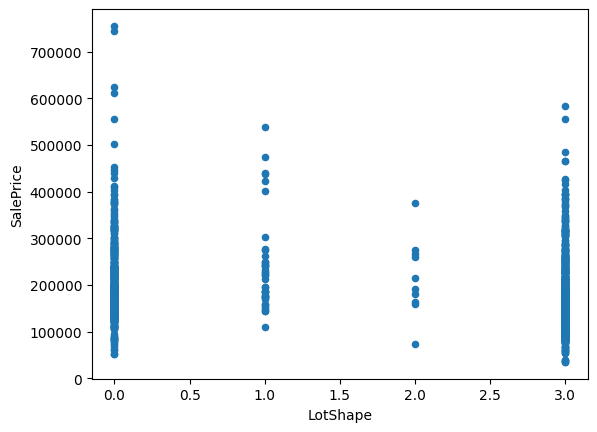

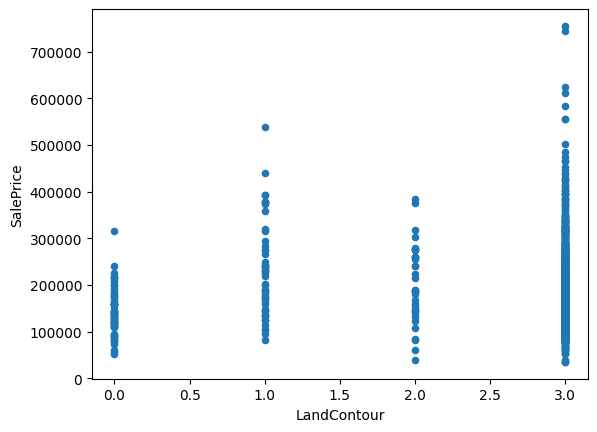

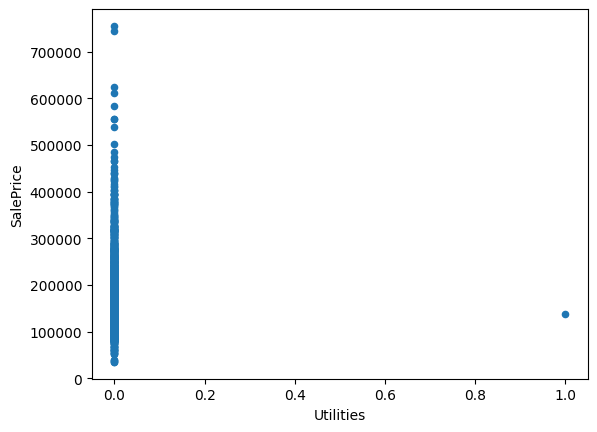

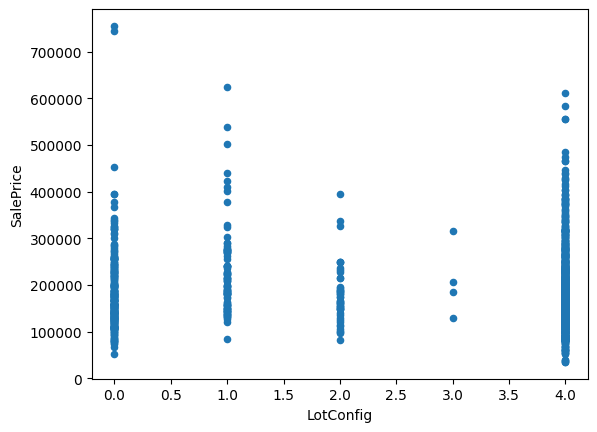

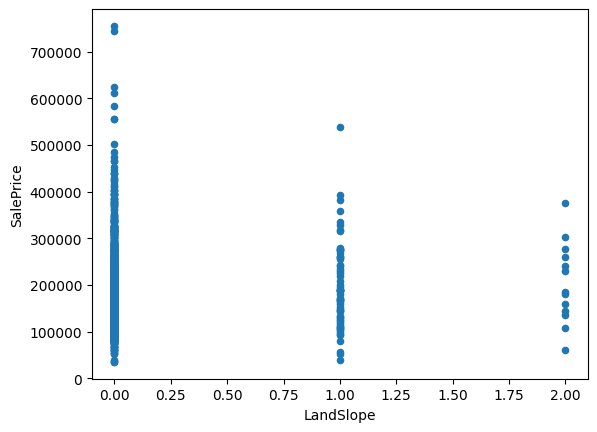

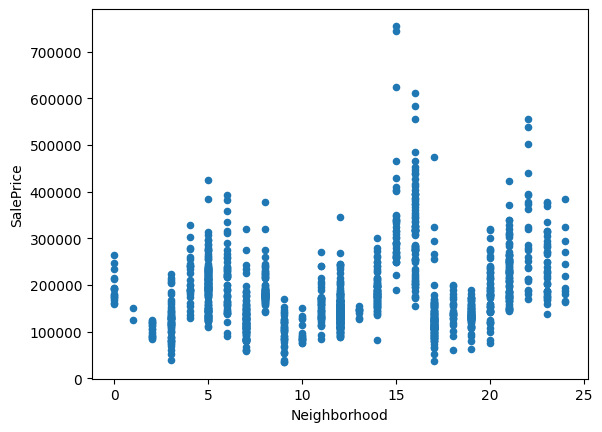

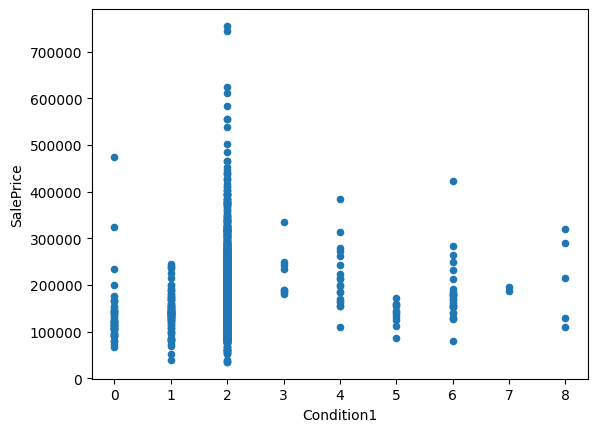

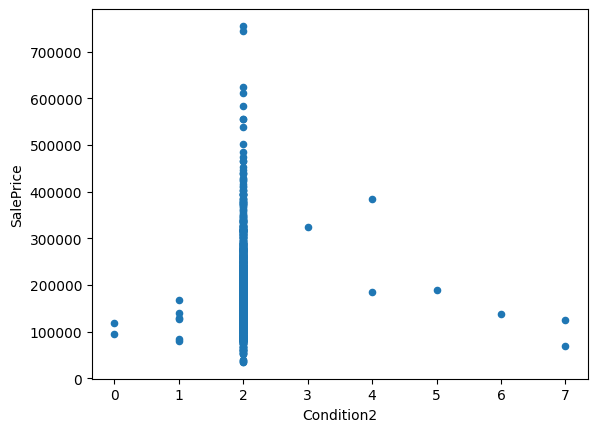

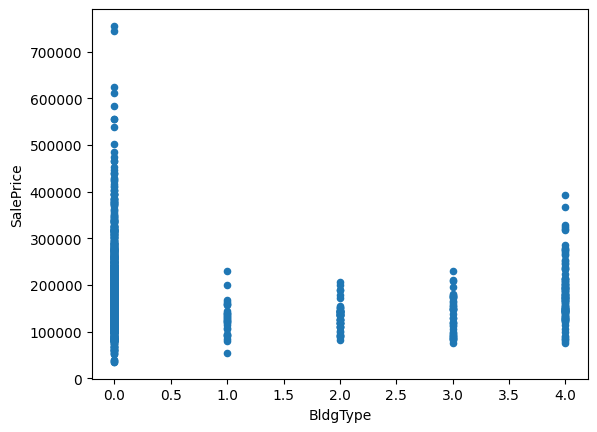

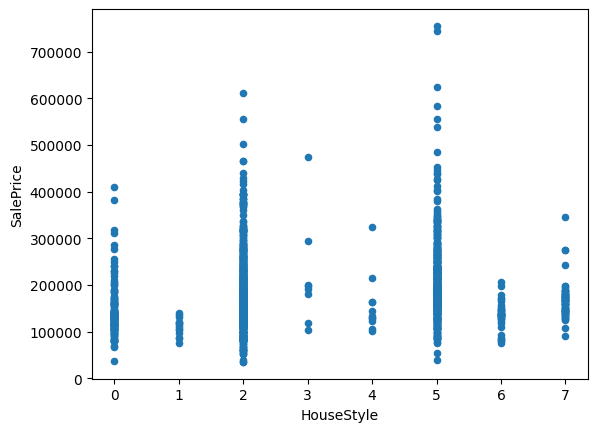

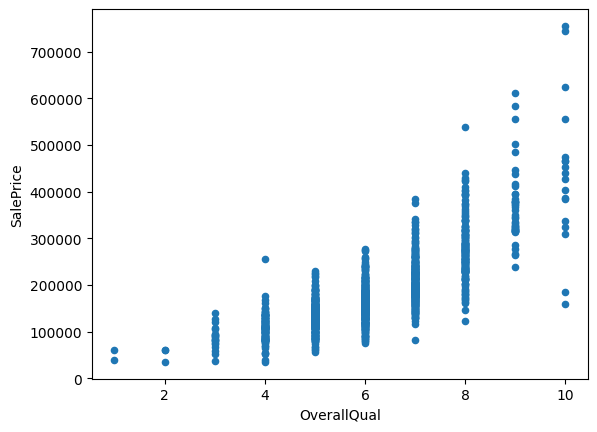

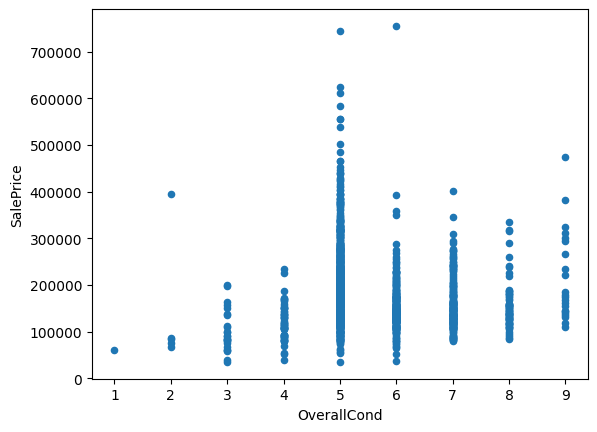

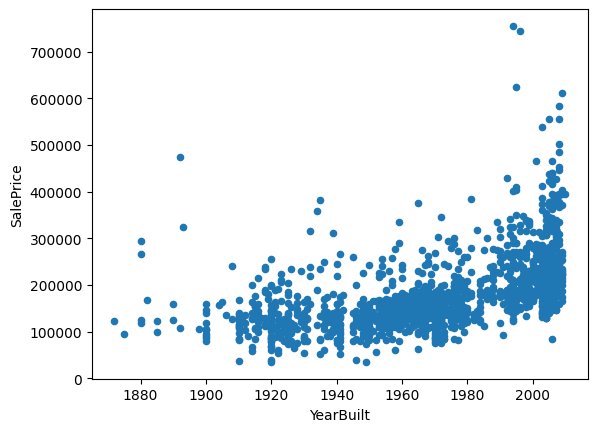

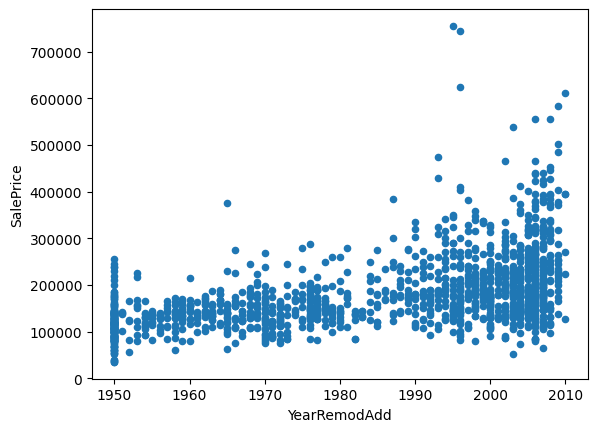

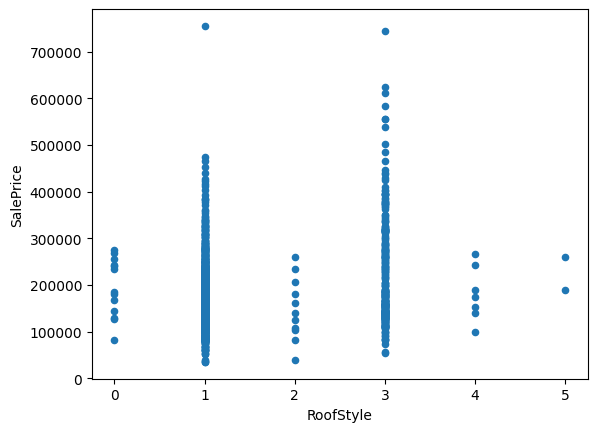

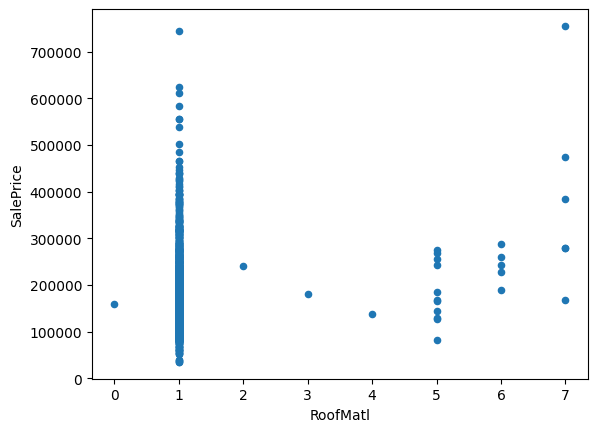

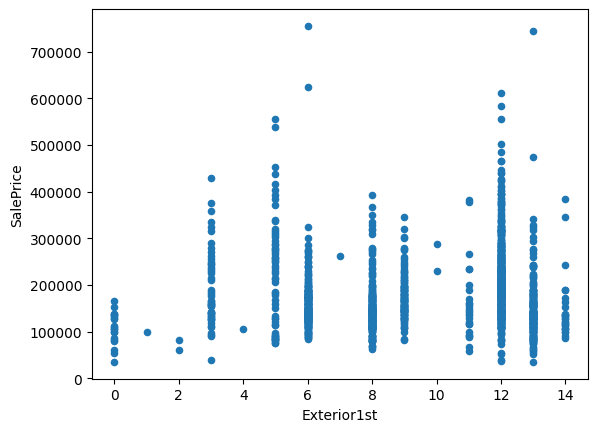

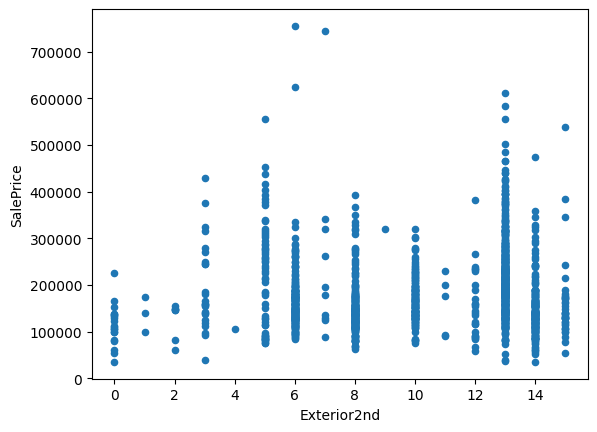

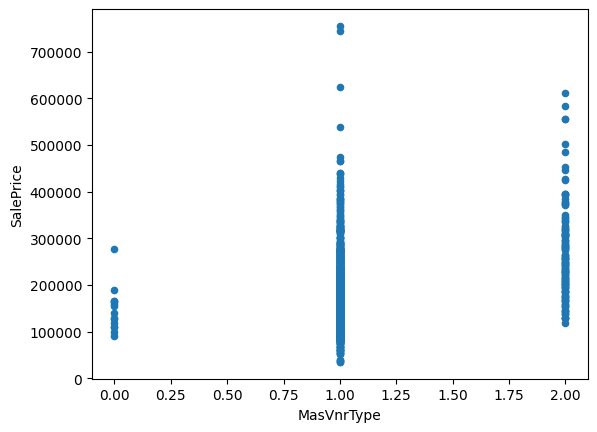

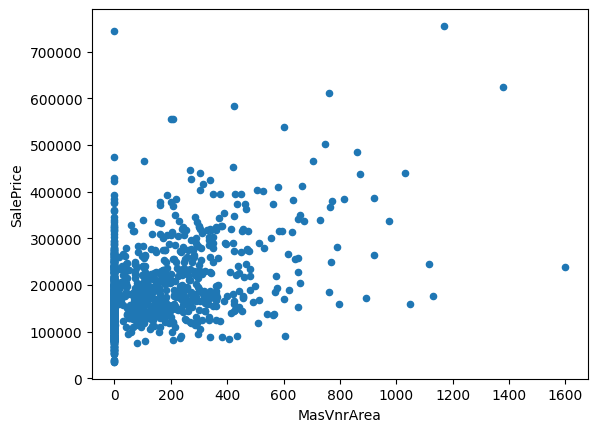

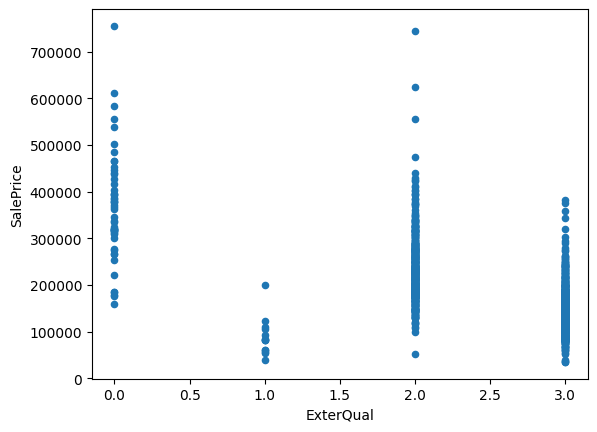

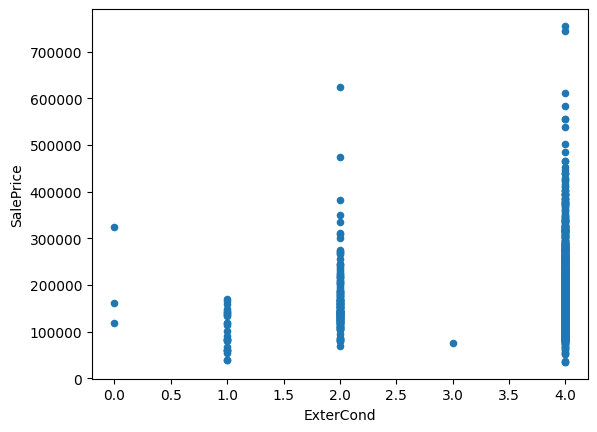

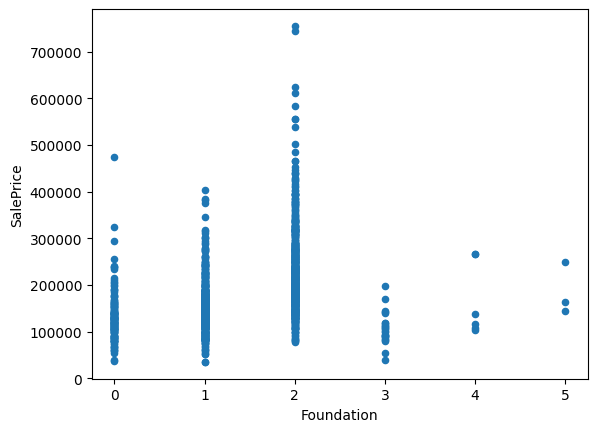

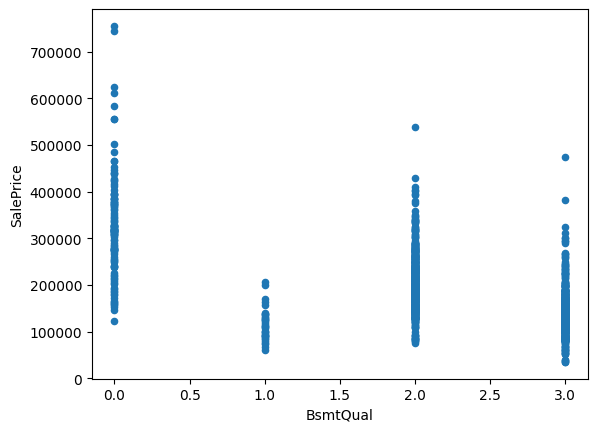

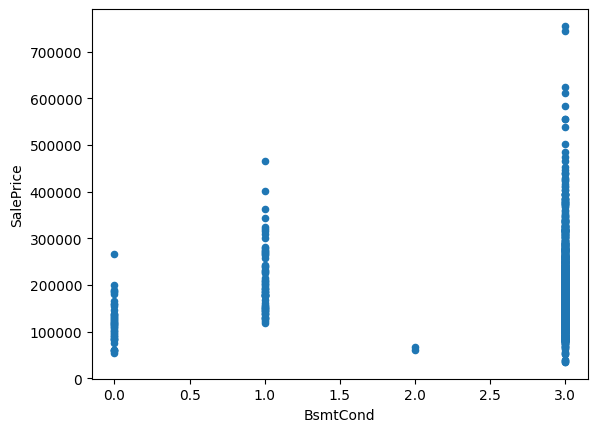

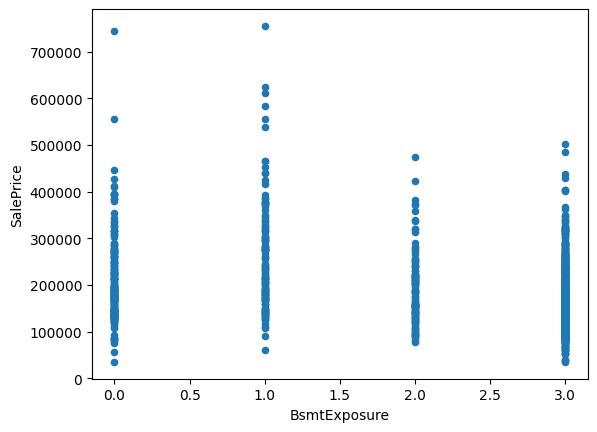

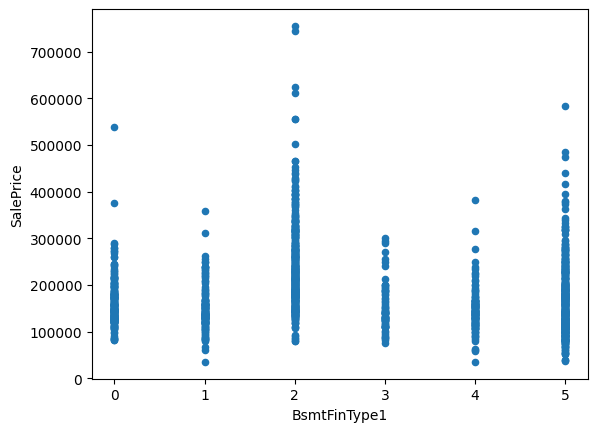

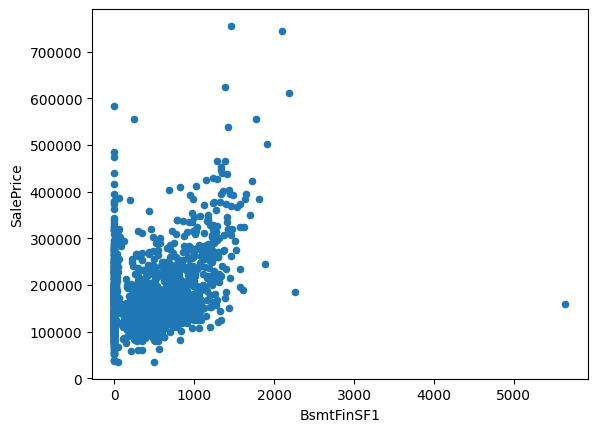

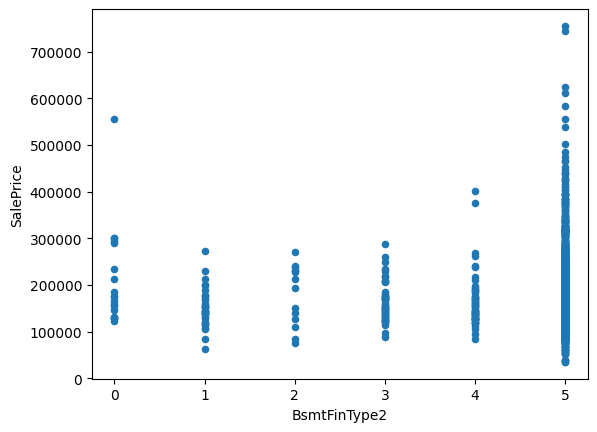

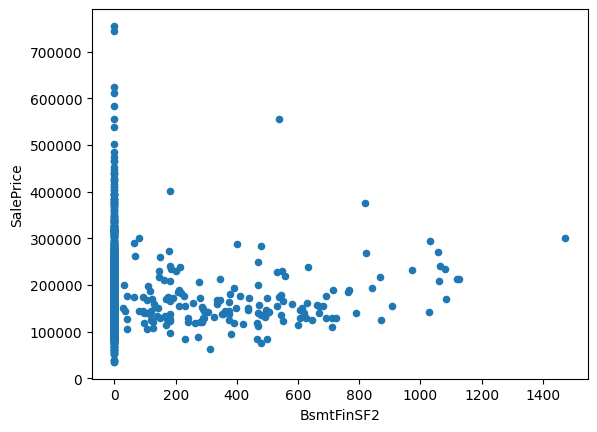

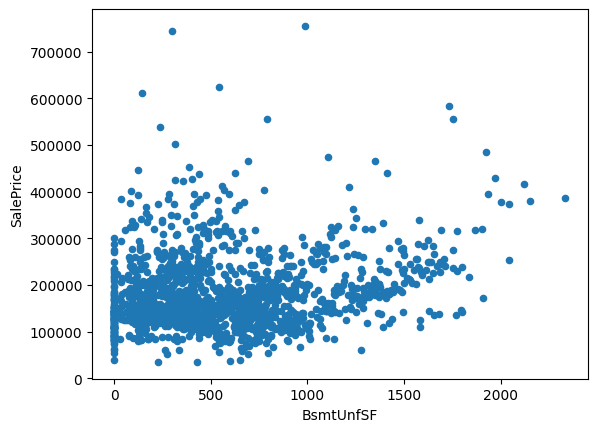

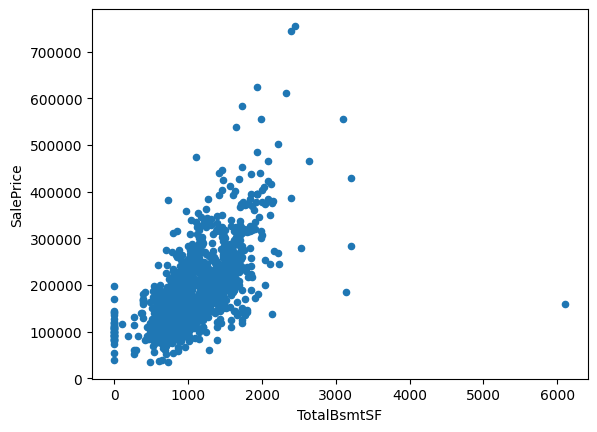

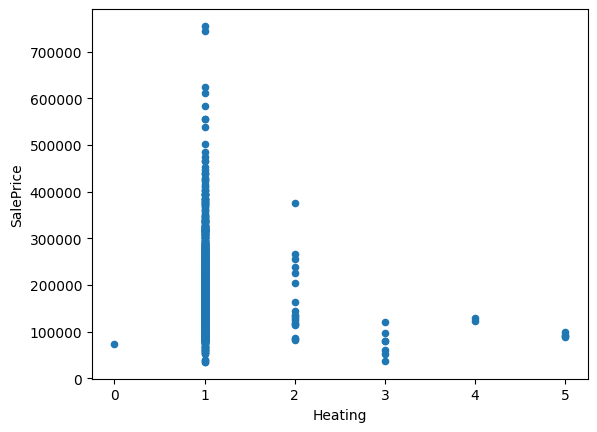

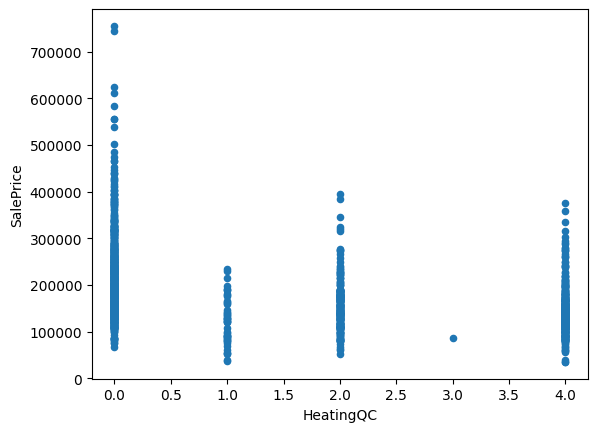

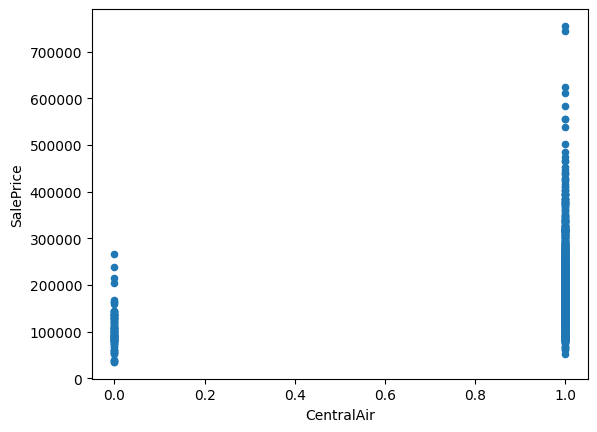

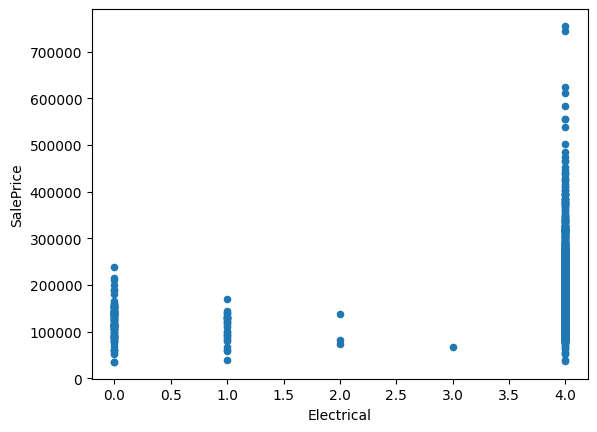

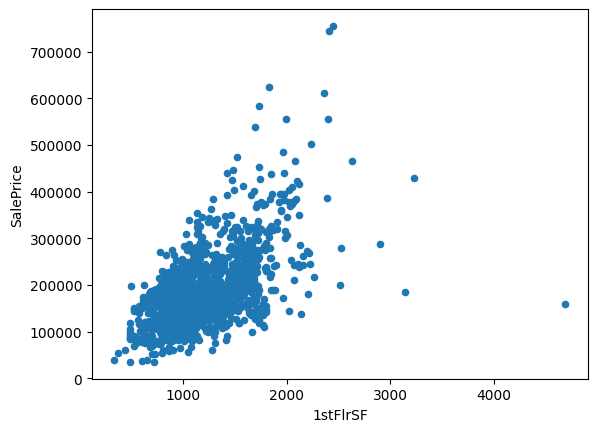

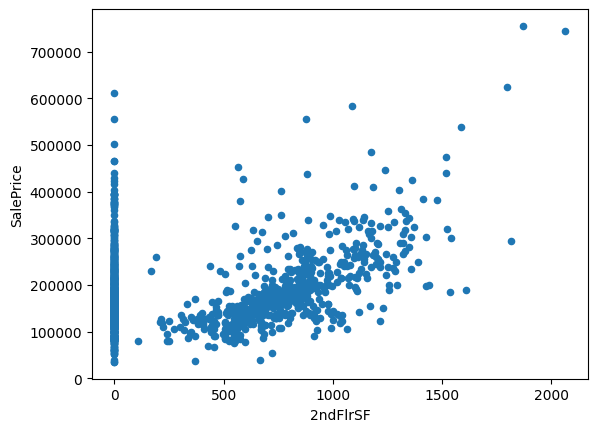

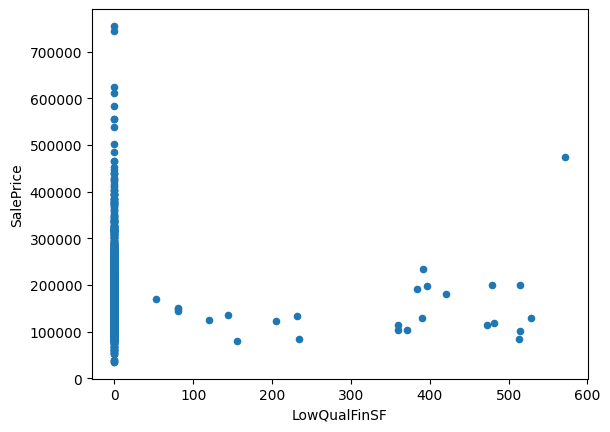

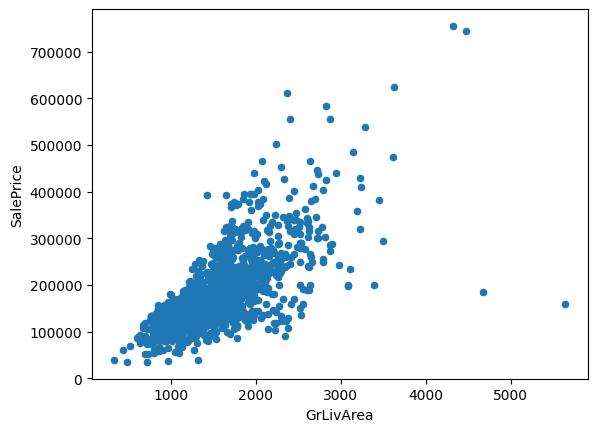

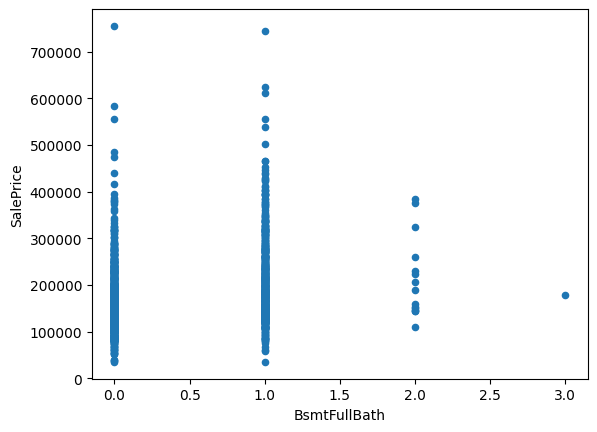

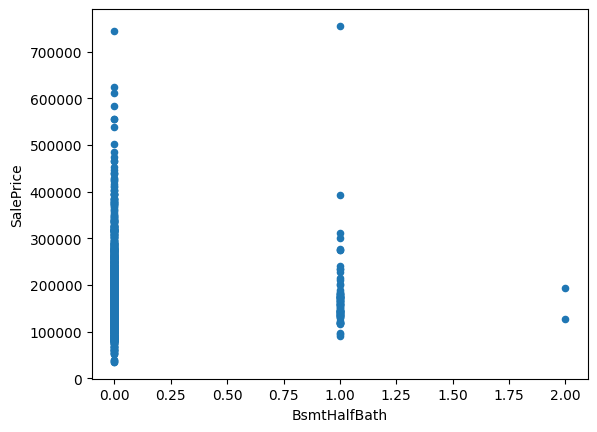

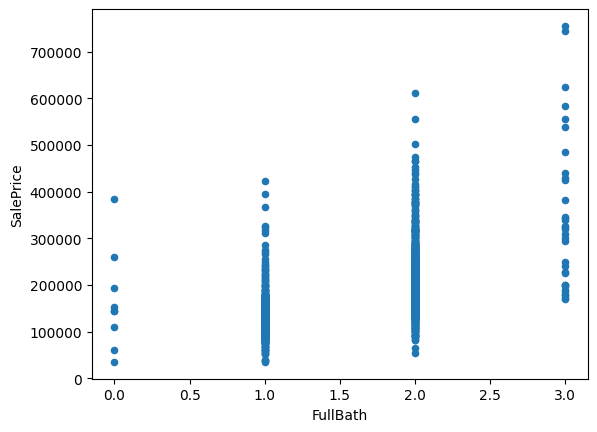

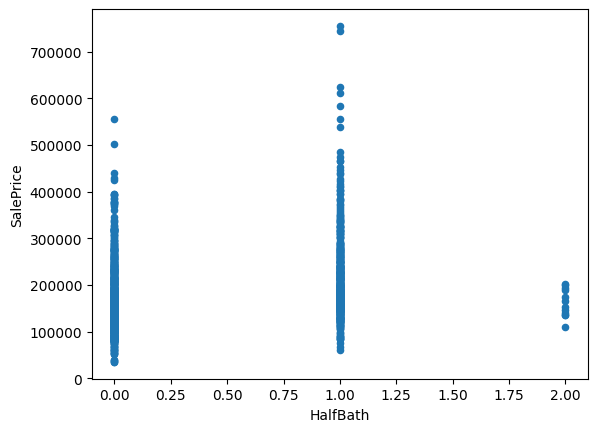

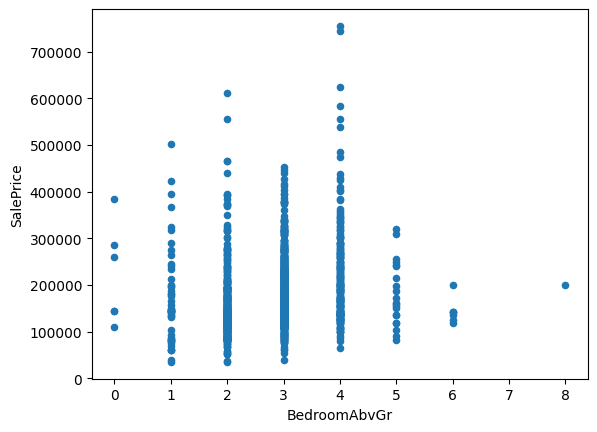

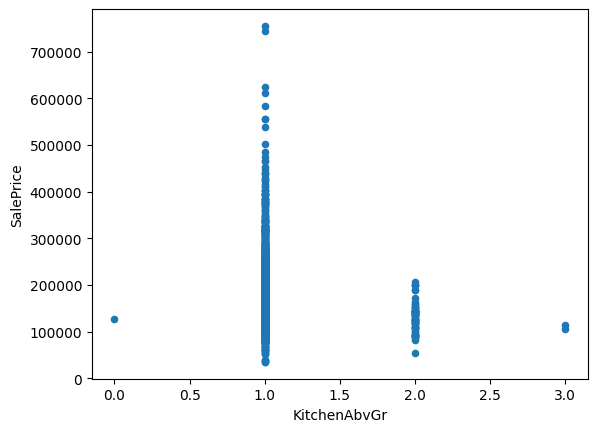

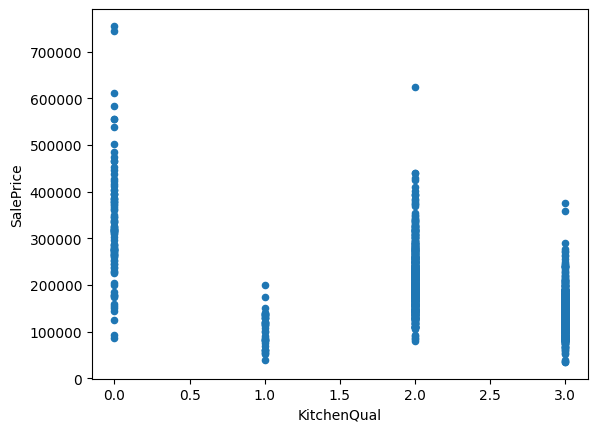

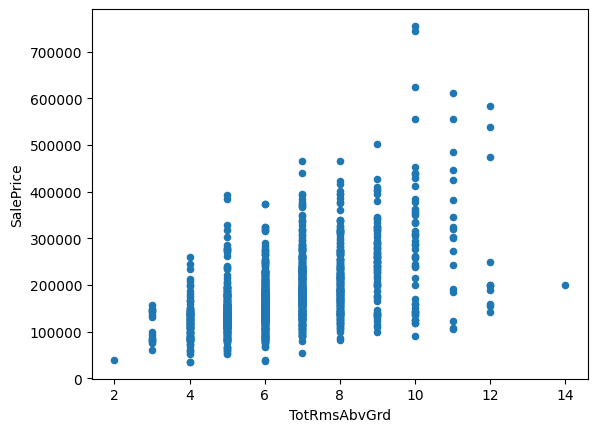

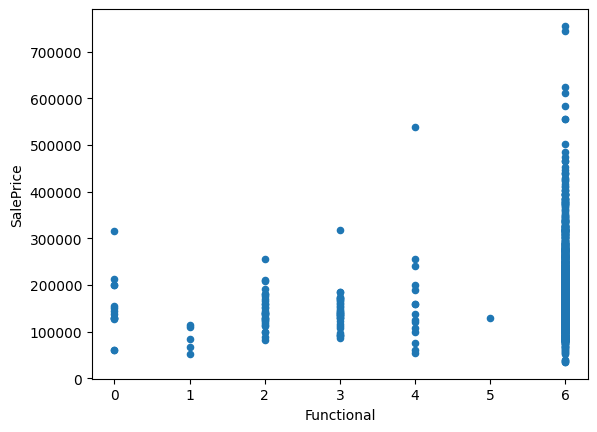

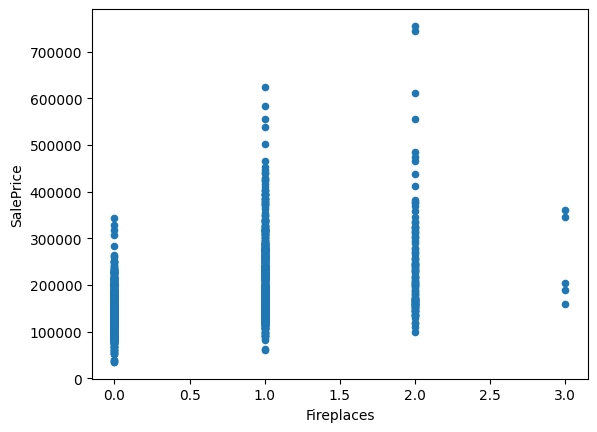

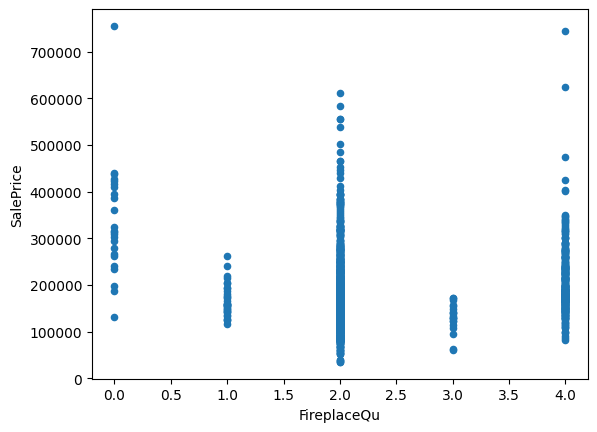

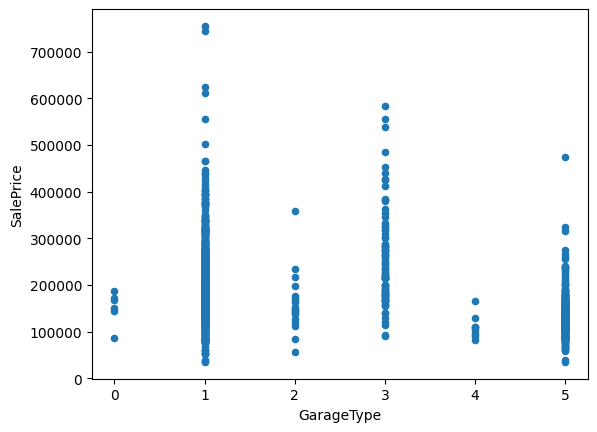

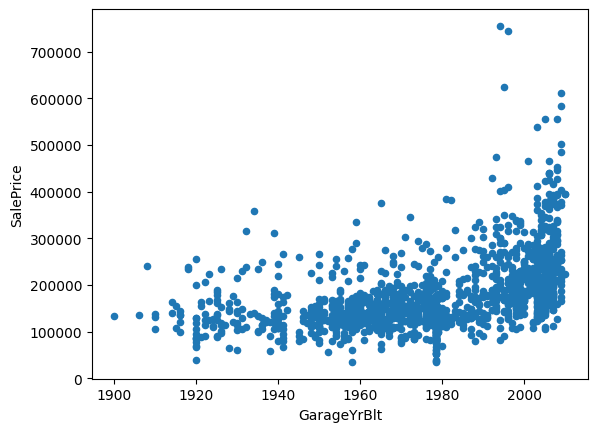

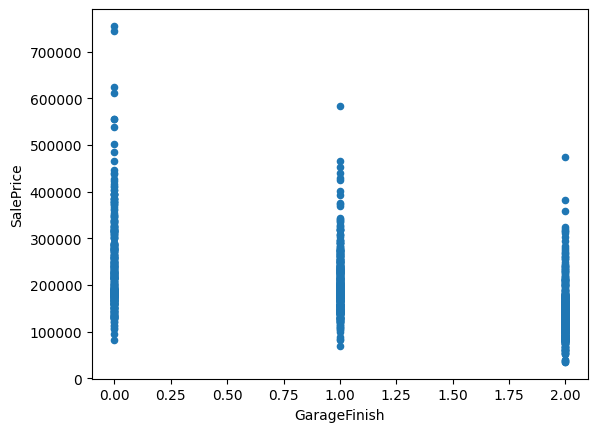

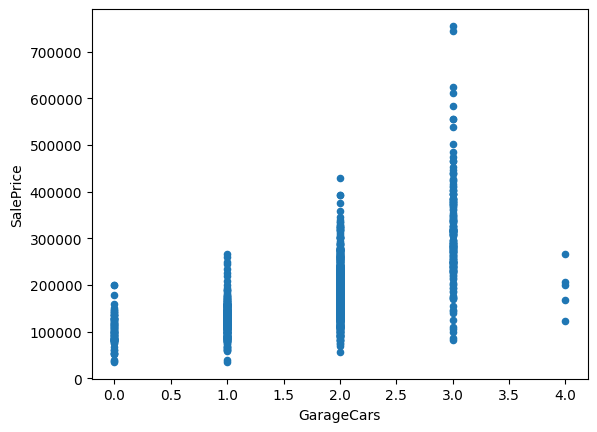

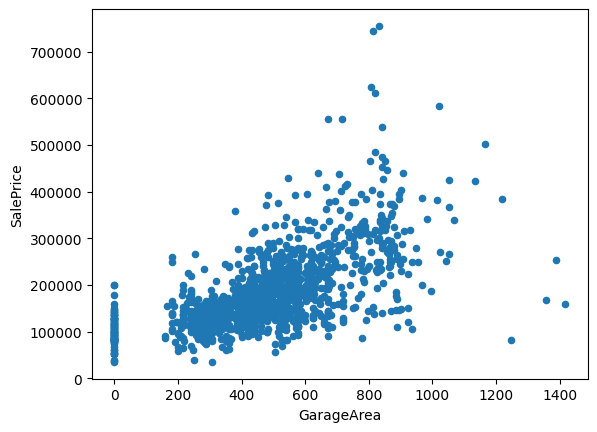

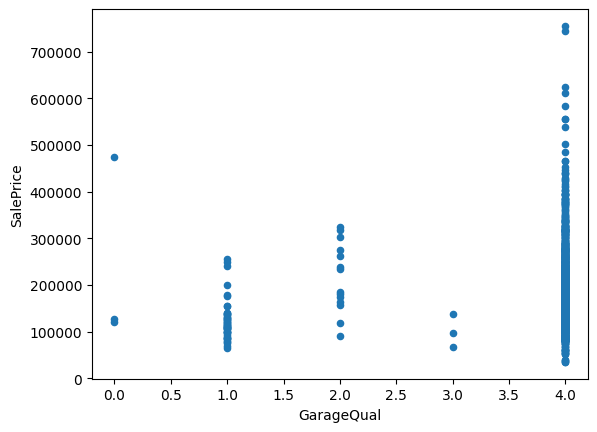

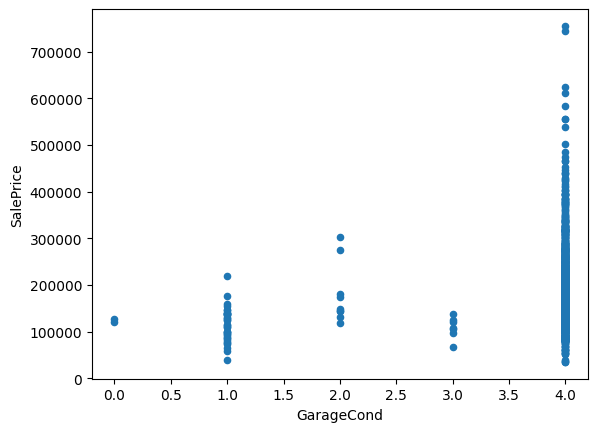

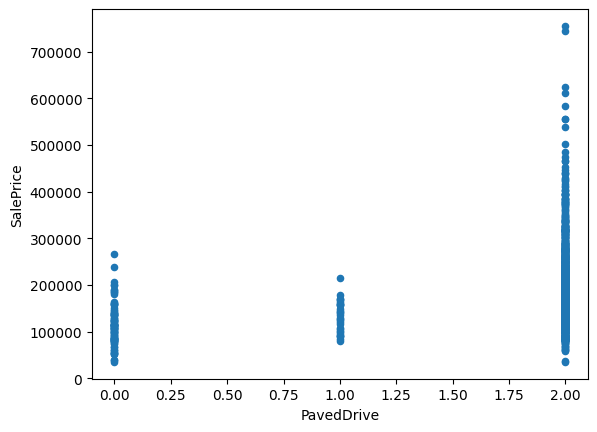

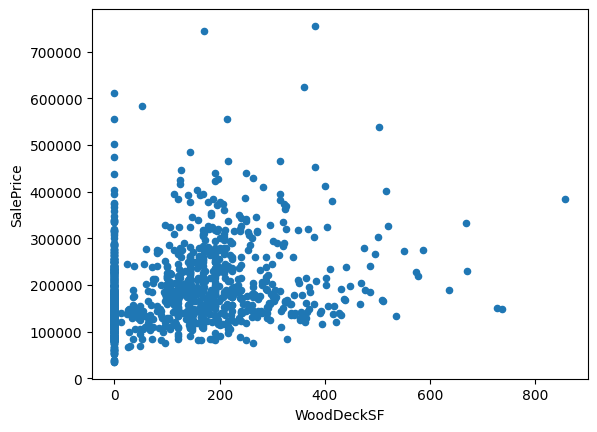

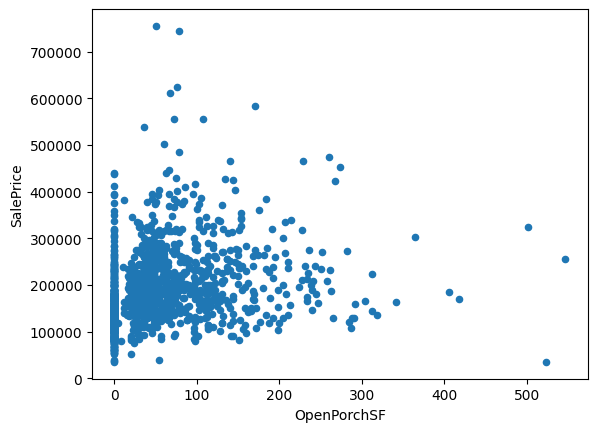

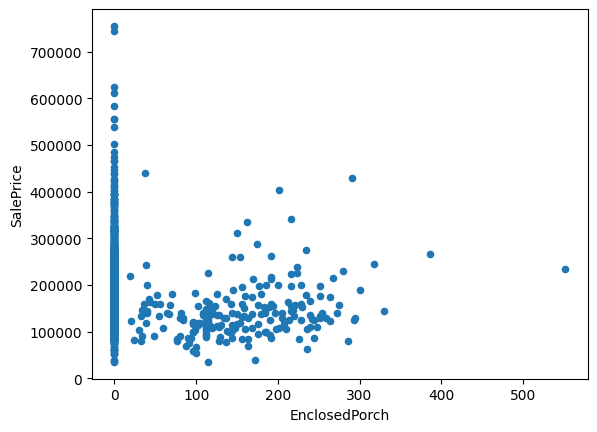

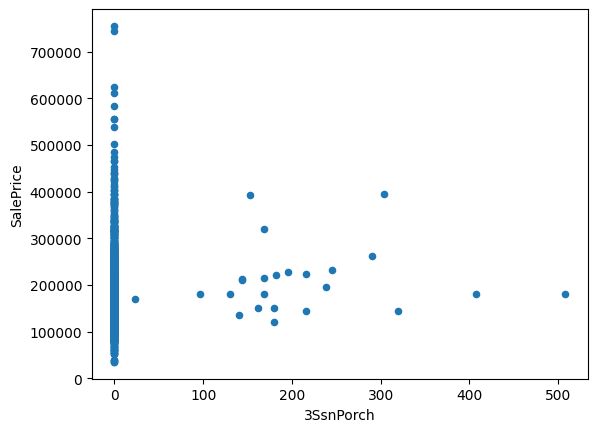

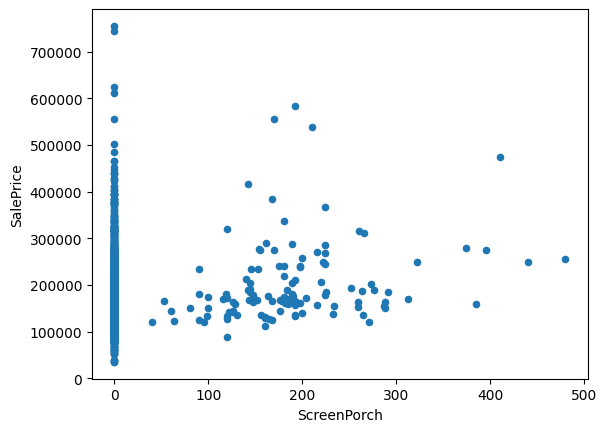

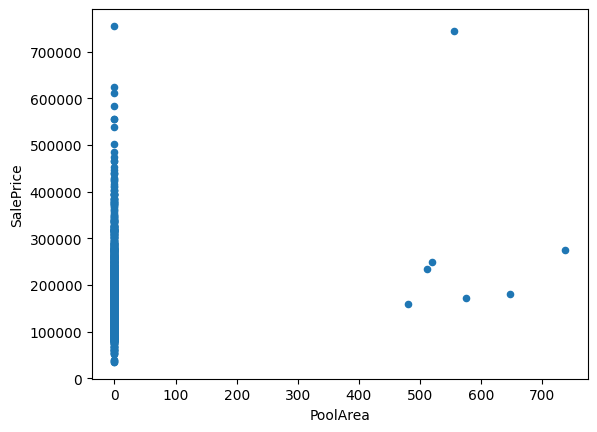

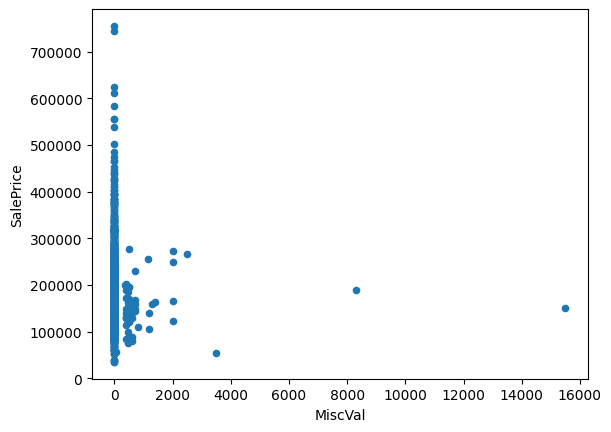

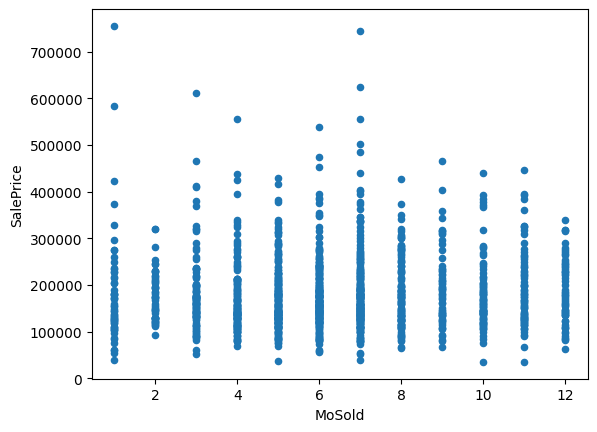

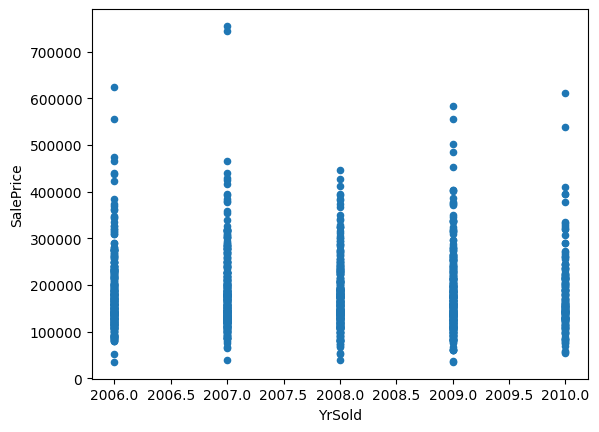

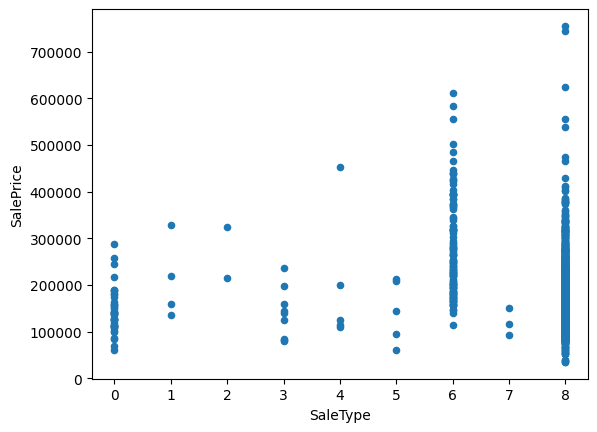

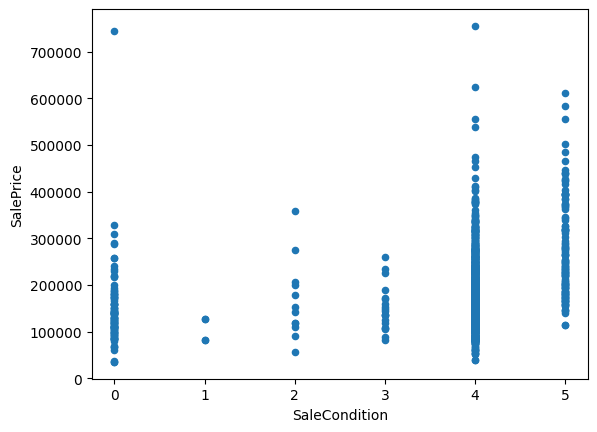

In [83]:
for column in columns_giver():
  if column not in ['Id', 'SalePrice']:
    new_data.plot(kind = 'scatter', x = f'{column}', y = 'SalePrice')
    plt.show()
    # you will see some of them are useless and you can delete them

## feature importance

###  Feature Importance Using Scikit-learn

In [84]:
from sklearn.ensemble import RandomForestClassifier
# Feature importance
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(new_data.drop('SalePrice', axis=1), new_data['SalePrice'])

importances = clf.feature_importances_
for feature, importance in zip(new_data.drop('SalePrice', axis=1).columns, importances):
    print(feature, importance)

MSSubClass 0.013393638622666964
MSZoning 0.00782345488311293
LotFrontage 0.032860053510507935
LotArea 0.0384135878148765
Street 0.000541519590892006
LotShape 0.010749260101270829
LandContour 0.00623435644977136
Utilities 7.41653027826098e-05
LotConfig 0.010687440184834661
LandSlope 0.003679867229491206
Neighborhood 0.024144686658123506
Condition1 0.009224374278601946
Condition2 0.0011809995827661188
BldgType 0.00531652048472345
HouseStyle 0.010526169503712794
OverallQual 0.017905690729963543
OverallCond 0.016202610099682525
YearBuilt 0.031057614955964073
YearRemodAdd 0.02928106141729504
RoofStyle 0.008592648684244237
RoofMatl 0.0015486839856959894
Exterior1st 0.018035299491030256
Exterior2nd 0.019294346123373364
MasVnrType 0.005626750436397084
MasVnrArea 0.02211137278508776
ExterQual 0.006911243660388009
ExterCond 0.006982222722630343
Foundation 0.009167002170621824
BsmtQual 0.008533398340014068
BsmtCond 0.005341361942529957
BsmtExposure 0.012066553743068358
BsmtFinType1 0.015930572253

#### Plotting Feature Importance on a Chart

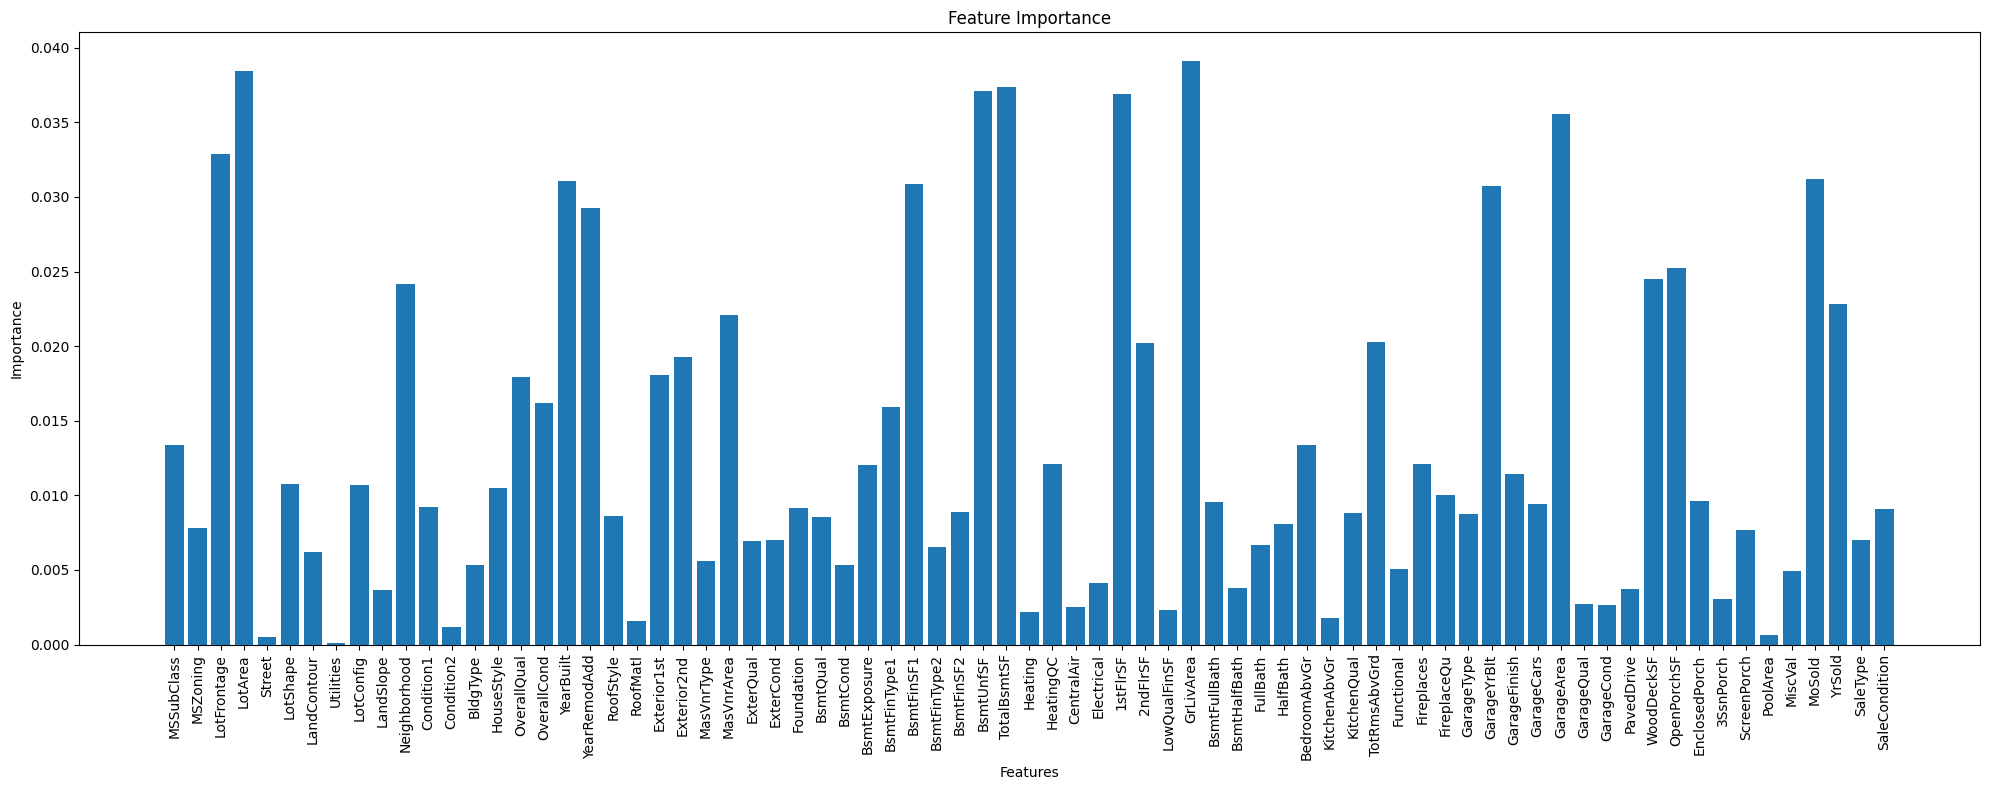

In [85]:
plt.figure(figsize=(20, 8)) # Increase figure size for better readability
plt.bar(range(new_data.drop('SalePrice', axis=1).shape[1]), clf.feature_importances_)
plt.xticks(range(new_data.drop('SalePrice', axis=1).shape[1]), new_data.drop('SalePrice', axis=1).columns, rotation=90) # Add feature names as x-axis labels and rotate them
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance') # Add a title for clarity
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Feature Selection with corerelation matrix

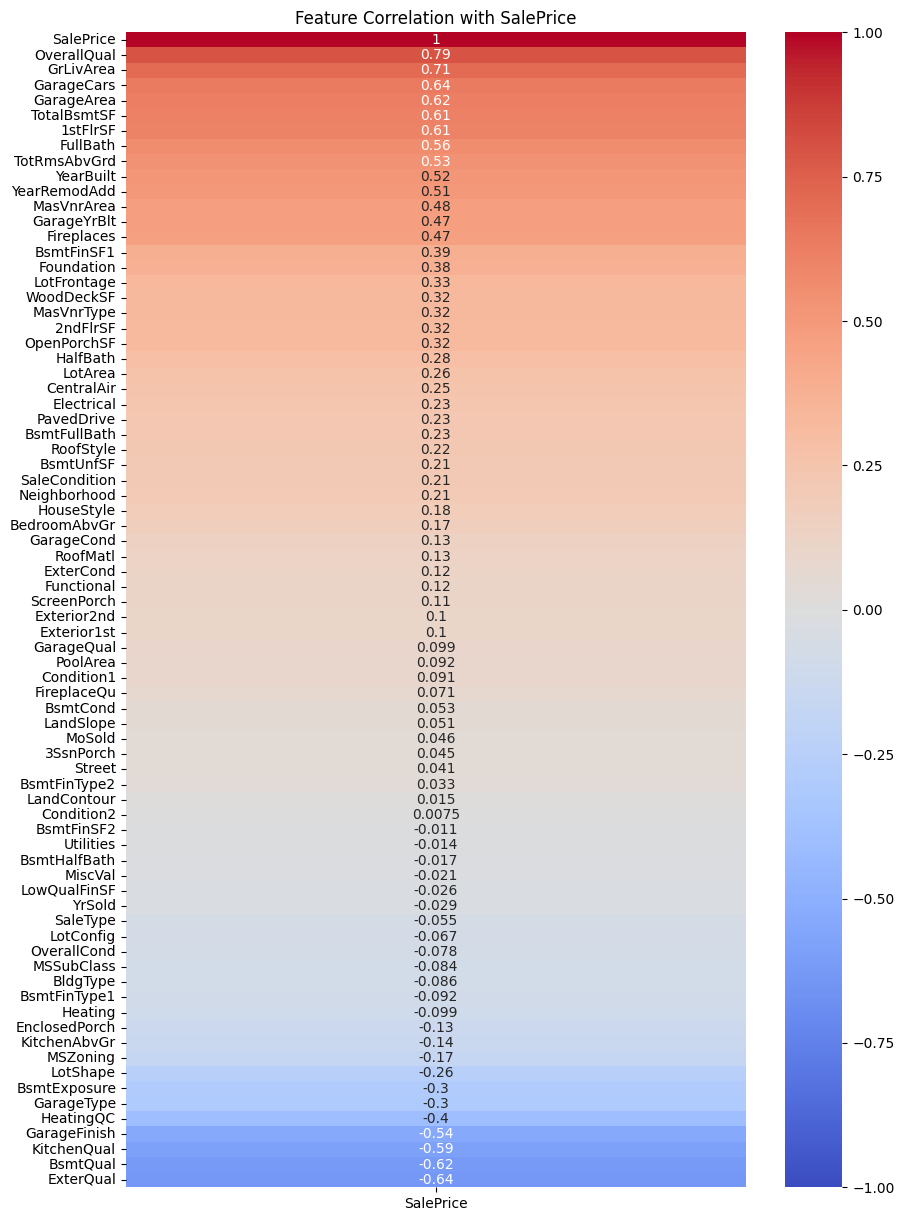

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation of each feature with 'SalePrice'
house_price_sale_price_corr = new_data.corr()['SalePrice'].sort_values(ascending=False)

# Create a heatmap of the correlations with 'SalePrice'
plt.figure(figsize=(10, 15)) # Adjusted figure size for a single column of correlations
sns.heatmap(house_price_sale_price_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1) # Convert series to dataframe for heatmap, add annotations
plt.title('Feature Correlation with SalePrice')
plt.show()

## We need to delete some columns

In [87]:
for importance_column, column in sorted(zip(clf.feature_importances_, new_data.drop('SalePrice', axis=1).columns), reverse=True):
  if importance_column < 0.01:
    new_data = new_data.drop(column, axis=1)

In [89]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE (Recursive Feature Elimination)
estimator = LinearRegression() # Base estimator
selector_rfe = RFE(estimator=estimator) # Select top half features based on previous analysis

# Select only numeric columns for RFE
numeric_data = new_data.select_dtypes(include=['float64', 'int64'])

# Fit RFE to the training data to identify the selected features
selector_rfe.fit(numeric_data.drop('SalePrice', axis=1), numeric_data['SalePrice'])

# Get the names of the selected features using the original X_train columns
selected_features = numeric_data.drop('SalePrice', axis=1).columns[selector_rfe.support_]

# Identify the features to drop (those not selected by RFE)
features_to_drop_rfe = numeric_data.drop('SalePrice', axis=1).columns[~selector_rfe.support_]

# Drop the unselected features from the original new_data DataFrame
new_data = new_data.drop(columns=features_to_drop_rfe)

print("Features selected by RFE:")
print(list(selected_features))
print("\nShape of new_data after RFE feature selection:", new_data.shape)

Features selected by RFE:
['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'MoSold', 'YrSold']

Shape of new_data after RFE feature selection: (1460, 23)


# Step 3: Splitting the data

In [90]:
# Now I'm spliting data to two part for trsining and testing
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('SalePrice', axis=1), new_data['SalePrice'], test_size=0.2, random_state=42)

In [91]:
# Now I want to normalize them in two difreent way:
# 1: with RobustScaler
# 2: StandardScaler

# Apply RobustScaler
robust_scaler = RobustScaler()
X_train_robustscaled = robust_scaler.fit_transform(X_train)
X_test_robustscaled = robust_scaler.transform(X_test)

# Apply StandardScaler
standard_scaler = StandardScaler()
X_train_standardscaled = standard_scaler.fit_transform(X_train)
X_test_standardscaled = standard_scaler.transform(X_test)

print("Data scaled using RobustScaler and StandardScaler.")

Data scaled using RobustScaler and StandardScaler.



# I want use 3 models for this
+ Random forest
+ Linesar Regression
+ Gradient Boosting

## Random forest

### Code

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [97]:
# Use RandomForestRegressor for regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

data_versions = {
    "Original Data": (X_train, X_test, y_train, y_test),
    "Robust Scaled Data": (X_train_robustscaled, X_test_robustscaled, y_train, y_test),
    "Standard Scaled Data": (X_train_standardscaled, X_test_standardscaled, y_train, y_test)
}

best_r2 = -float('inf')
best_version = None
results = {}
y_pred_rf_best = None # Variable to store y_pred for the best version

for version_name, (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled) in data_versions.items():
    print(f"Training on {version_name}...")

    # Fit the regressor to our data
    rf_regressor.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_pred_for_rf = rf_regressor.predict(X_test_scaled)

    # Evaluate the regressor using regression metrics
    mae = mean_absolute_error(y_test_scaled, y_pred_for_rf)
    r2 = r2_score(y_test_scaled, y_pred_for_rf)
    mse = mean_squared_error(y_test_scaled, y_pred_for_rf)
    rmse = mse ** 0.5 # Calculate RMSE by taking the square root of MSE

    results[version_name] = {"MAE": mae, "R2": r2, "MSE": mse, "RMSE": rmse}

    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  R-squared (R2): {r2:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("-" * 30)

    if r2 > best_r2:
        best_r2 = r2
        best_version = version_name
        y_pred_rf_best = y_pred_for_rf # Store y_pred for the best version
        result_for_rf = {}
        result_for_rf["MAE"] = mae
        result_for_rf["R2"] = r2
        result_for_rf["MSE"] = mse
        result_for_rf["RMSE"] = rmse


print(f"The best performing data version based on R-squared is: {best_version}")

Training on Original Data...
  Mean Absolute Error (MAE): 19017.68
  R-squared (R2): 0.89
  Mean Squared Error (MSE): 872936870.20
  Root Mean Squared Error (RMSE): 29545.51
------------------------------
Training on Robust Scaled Data...
  Mean Absolute Error (MAE): 19004.44
  R-squared (R2): 0.89
  Mean Squared Error (MSE): 873089706.13
  Root Mean Squared Error (RMSE): 29548.09
------------------------------
Training on Standard Scaled Data...
  Mean Absolute Error (MAE): 19023.81
  R-squared (R2): 0.89
  Mean Squared Error (MSE): 872467338.79
  Root Mean Squared Error (RMSE): 29537.56
------------------------------
The best performing data version based on R-squared is: Standard Scaled Data


### Residual Plot for Random Forest Model

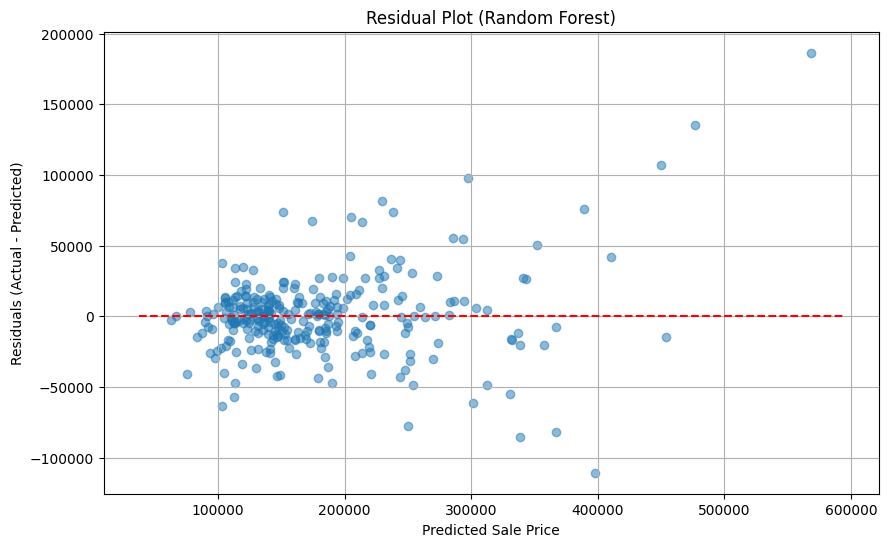

In [98]:
residuals_rf = y_test - y_pred_for_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_for_rf, residuals_rf, alpha=0.5)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Random Forest)")
plt.hlines(0, plt.xlim()[0], plt.xlim()[1], color='red', linestyle='--')
plt.grid(True)
plt.show()

## Linesar Regression

### Code

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [100]:
data_versions = {
    "Original Data": (X_train, X_test, y_train, y_test),
    "Robust Scaled Data": (X_train_robustscaled, X_test_robustscaled, y_train, y_test),
    "Standard Scaled Data": (X_train_standardscaled, X_test_standardscaled, y_train, y_test)
}

best_ln = -float('inf')
best_version = None
results = {}
y_pred_lr_best = None # Variable to store y_pred for the best version

for version_name, (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled) in data_versions.items():
    print(f"Training on {version_name}...")

    # Fit the regressor to our data
    model = LinearRegression()
    model.fit(X_train_scaled, y_train_scaled)

    # Make predictions.
    y_pred_for_ln = model.predict(X_test_scaled)

    # Evaluate the regressor using regression metrics
    mae = mean_absolute_error(y_test_scaled, y_pred_for_ln)
    r2 = r2_score(y_test_scaled, y_pred_for_ln)
    mse = mean_squared_error(y_test_scaled, y_pred_for_ln)
    rmse = mse ** 0.5 # Calculate RMSE by taking the square root of MSE

    results[version_name] = {"MAE": mae, "R2": r2, "MSE": mse, "RMSE": rmse}

    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  R-squared (R2): {r2:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("-" * 30)

    if r2 > best_ln:
        best_ln = r2
        best_version = version_name
        y_pred_lr_best = y_pred_for_ln # Store y_pred for the best version
        result_for_ln = {}
        result_for_ln["MAE"] = mae
        result_for_ln["R2"] = r2
        result_for_ln["MSE"] = mse
        result_for_ln["RMSE"] = rmse

print(f"The best performing data version based on R-squared is: {best_version}")

Training on Original Data...
  Mean Absolute Error (MAE): 23229.67
  R-squared (R2): 0.82
  Mean Squared Error (MSE): 1394544837.32
  Root Mean Squared Error (RMSE): 37343.61
------------------------------
Training on Robust Scaled Data...
  Mean Absolute Error (MAE): 23229.67
  R-squared (R2): 0.82
  Mean Squared Error (MSE): 1394544837.32
  Root Mean Squared Error (RMSE): 37343.61
------------------------------
Training on Standard Scaled Data...
  Mean Absolute Error (MAE): 23229.67
  R-squared (R2): 0.82
  Mean Squared Error (MSE): 1394544837.32
  Root Mean Squared Error (RMSE): 37343.61
------------------------------
The best performing data version based on R-squared is: Original Data


### Residual Plot for Linear Regression Model

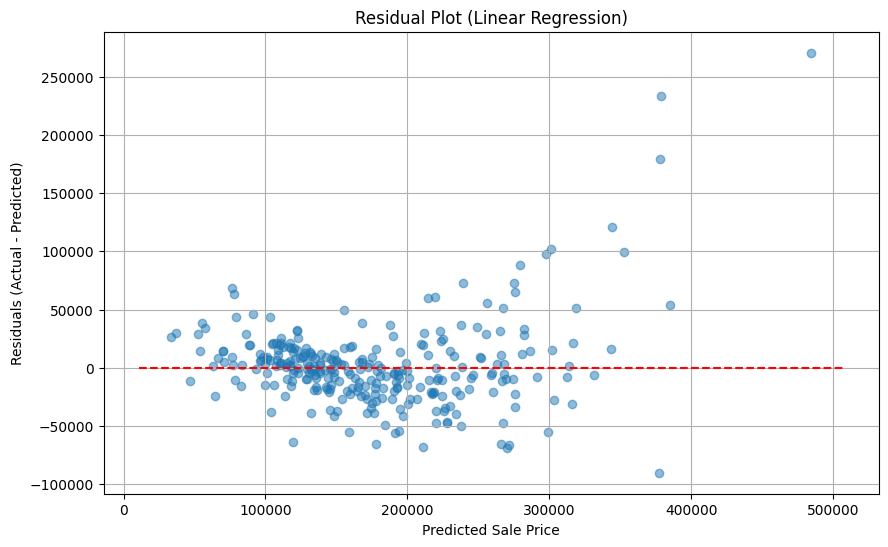

In [101]:
residuals_lr = y_test - y_pred_for_ln

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_for_ln, residuals_lr, alpha=0.5)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Linear Regression)")
plt.hlines(0, plt.xlim()[0], plt.xlim()[1], color='red', linestyle='--')
plt.grid(True)
plt.show()

## Gradient Boosting

### Code

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [103]:
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter grid for GradientBoostingRegressor
gbr_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None], # Updated max_features
    'subsample': [0.8, 0.9, 1.0]
}

gbr_random_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=42),
                                       gbr_param_grid,
                                       random_state=42,
                                       n_iter=50) # Increased n_iter for a more thorough search

gbr_random_search.fit(X_train_robustscaled, y_train) # Using robust scaled data as it performed best earlier
print("Best parameters for Gradient Boosting:")
print(gbr_random_search.best_params_)
print("\nBest estimator for Gradient Boosting:")
print(gbr_random_search.best_estimator_)

Best parameters for Gradient Boosting:
{'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.05}

Best estimator for Gradient Boosting:
GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_leaf=4,
                          min_samples_split=5, n_estimators=500,
                          random_state=42, subsample=0.8)


In [104]:
SEED = 23

gbr = GradientBoostingRegressor(learning_rate=0.05, max_depth=4,min_samples_leaf=4, min_samples_split=5, n_estimators=500, random_state=42, subsample=0.8)

data_versions = {
    "Original Data": (X_train, X_test, y_train, y_test),
    "Robust Scaled Data": (X_train_robustscaled, X_test_robustscaled, y_train, y_test),
    "Standard Scaled Data": (X_train_standardscaled, X_test_standardscaled, y_train, y_test)
}


best_gr = -float('inf')
best_version = None
results = {}
y_pred_gbr_best = None # Variable to store y_pred for the best version

for version_name, (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled) in data_versions.items():
    print(f"Training on {version_name}...")

    # Fit the regressor to our data
    gbr.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_pred_for_gbr = gbr.predict(X_test_scaled)

    # Evaluate the regressor using regression metrics
    mae = mean_absolute_error(y_test_scaled, y_pred_for_gbr)
    r2 = r2_score(y_test_scaled, y_pred_for_gbr)
    mse = mean_squared_error(y_test_scaled, y_pred_for_gbr)
    rmse = mse ** 0.5 # Calculate RMSE by taking the square root of MSE

    results[version_name] = {"MAE": mae, "R2": r2, "MSE": mse, "RMSE": rmse}

    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  R-squared (R2): {r2:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("-" * 30)

    if r2 > best_gr:
        best_gr = r2
        best_version = version_name
        y_pred_gbr_best = y_pred_for_gbr # Store y_pred for the best version
        result_for_gr = {}
        result_for_gr["MAE"] = mae
        result_for_gr["R2"] = r2
        result_for_gr["MSE"] = mse
        result_for_gr["RMSE"] = rmse


print(f"The best performing data version based on R-squared is: {best_version}")

Training on Original Data...
  Mean Absolute Error (MAE): 17896.14
  R-squared (R2): 0.90
  Mean Squared Error (MSE): 784495653.93
  Root Mean Squared Error (RMSE): 28008.85
------------------------------
Training on Robust Scaled Data...
  Mean Absolute Error (MAE): 17976.50
  R-squared (R2): 0.90
  Mean Squared Error (MSE): 784887191.88
  Root Mean Squared Error (RMSE): 28015.84
------------------------------
Training on Standard Scaled Data...
  Mean Absolute Error (MAE): 18220.15
  R-squared (R2): 0.90
  Mean Squared Error (MSE): 802487322.05
  Root Mean Squared Error (RMSE): 28328.21
------------------------------
The best performing data version based on R-squared is: Original Data


### Residual Plot for Gradient Boosting Model

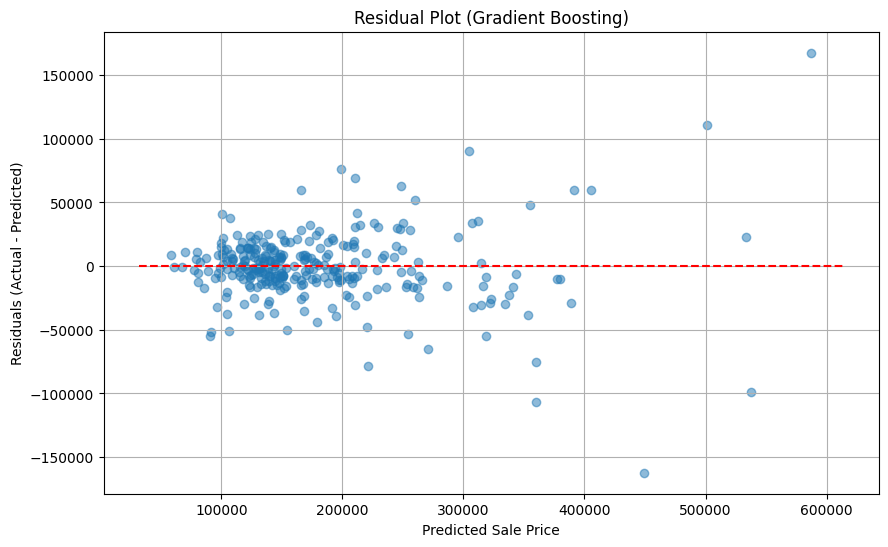

In [105]:
residuals_gbr = y_test - y_pred_for_gbr

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_for_gbr, residuals_gbr, alpha=0.5)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Gradient Boosting)")
plt.hlines(0, plt.xlim()[0], plt.xlim()[1], color='red', linestyle='--')
plt.grid(True)
plt.show()

# Comparing all models

In [106]:
comparison_data = {
    'Random Forest': result_for_rf,
    'Linear Regression': result_for_ln,
    'Gradient Boosting': result_for_gr
}

comparison_df = pd.DataFrame(comparison_data).T

print("Model Performance Comparison (Best Data Version for Each Model):")
display(comparison_df.sort_values(by='R2', ascending=False))

Model Performance Comparison (Best Data Version for Each Model):


,MAE,R2,MSE,RMSE
Gradient Boosting,17896.137202,0.897723,7.844957e+08,28008.849565
Random Forest,19023.813493,0.886254,8.724673e+08,29537.558105
Linear Regression,23229.672159,0.818190,1.394545e+09,37343.605039
